# Application 1.3: Real time sound processing

The Python libraries PyAudio, NumPy, SciPy, and Matplotlib were used to interact with the soundcard and perform real-time audio recording. The code below provides simple examples demonstrating how to record audio in real-time and perform frequency domain analysis or digital filtering.

Note: The code may lose samples depending on the computer's processing speed. 

### **1.3.1. Spectrum Analyzer**

This code showcases a real-time audio spectrum analyzer and uses the digital signal processing (DSP) principles below:

- **Sampling:** The audio signal is sampled at a defined rate (Fs).

- **Fast Fourier Transform (FFT):** FFT is applied to the signal to decompose its frequency components.

- **Normalization:** The signal is normalized to the range [-1, 1].

- **Resulting FFT:** The magnitude of frequency components is computed.

- **Frequency Plot:** Frequencies and magnitudes are visualized in a graph.

Stopping Spectrum Analysis...


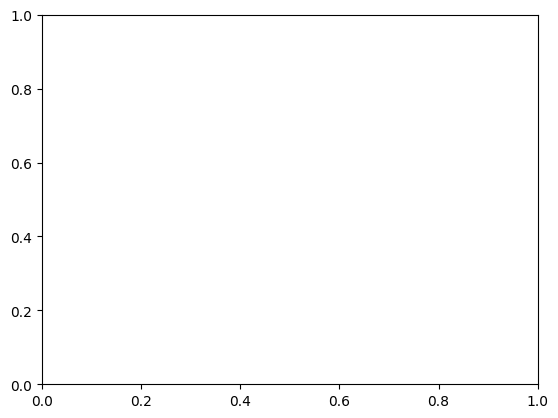

In [26]:
import numpy as np
import pyaudio
from scipy import signal, fftpack
import matplotlib.pyplot as plt
from IPython import display
import time as t

Fs = 8000  # Sampling rate (Hz)

p = pyaudio.PyAudio()
microphone = p.open(format=pyaudio.paInt16, channels=1, rate=Fs, input=True)
microphone.start_stream()

# Configure the spectrum analyzer
specAnalyzer = plt.figure()
ax = specAnalyzer.add_subplot(1, 1, 1)
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Magnitude")
ax.set_title("Audio Spectrum")

print("Spectrum Analysis - Infinite loop, stop with CTRL + C ...")
try:
    while True:
        audio = microphone.read(Fs)  # Record audio

        # Perform spectrum analysis
        audio = np.frombuffer(audio, dtype=np.int16) / 32768.0  # Normalize the audio
        freqs = fftpack.fftfreq(len(audio), 1 / Fs)
        fft_result = fftpack.fft(audio)
        magnitude = np.abs(fft_result)

        ax.clear()
        ax.plot(freqs, magnitude)
        ax.set_xlabel("Frequency (Hz)")  # Add this line to set the X-axis label
        ax.set_ylabel("Magnitude")     # Add this line to set the Y-axis label
        display.display(plt.gcf())
        t.sleep(0.001)
        plt.cla()
        display.clear_output(wait=True)

except KeyboardInterrupt:
    print("Stopping Spectrum Analysis...")
finally:
    microphone.stop_stream()
    microphone.close()
    p.terminate()


### **1.3.2. Digital Audio Filtering**

This code demonstrates real-time digital audio filtering and uses the digital signal processing (DSP) principles below:

- **Sampling:** The audio signal is sampled at a defined rate (Fs).

- **Butterworth Filter:** A 4th-order Butterworth filter is applied for digital filtering.

- **Filter Memory:** A filter memory is used to maintain the filter state.

- **Output Generation:** The filtered audio is generated and sent to the speaker.

In [22]:
import numpy as np
import pyaudio
from scipy import signal

Fs = 8000  # Sampling rate (Hz)

p = pyaudio.PyAudio()
microphone = p.open(format=pyaudio.paInt16, channels=1, rate=Fs, input=True)
microphone.start_stream()

# Configure the digital filter
B, A = signal.butter(4, 0.05)  # 4th-order Butterworth filter
filterMemory = np.zeros(max(len(B), len(A)) - 1)
speaker = p.open(format=pyaudio.paInt16, channels=1, rate=Fs, output=True)
speaker.start_stream()

print("Digital Filtering - Infinite loop, stop with CTRL + C ...")
try:
    while True:
        audio = microphone.read(Fs)  # Record audio

        # Perform digital filtering
        audio = np.frombuffer(audio, dtype=np.int16) / 32768.0  # Normalize the audio
        if not len(filterMemory) == 0:
            filterMemory = np.zeros(max(len(B), len(A)) - 1)
        output, filterMemory = signal.lfilter(B, A, audio, zi=filterMemory)
        speaker.write(
            (output * 32768).astype(np.int16)
        )  # Send the filtered audio to the speaker

except KeyboardInterrupt:
    print("Stopping Digital Filtering...")
finally:
    microphone.stop_stream()
    microphone.close()
    speaker.stop_stream()
    speaker.close()
    p.terminate()


Digital Filtering - Infinite loop, stop with CTRL + C ...


ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred


Stopping Digital Filtering...
